# Task 1: Changes in Property Prices

This notebook examines changes in average apartment prices across different areas of the country over a 36-month period. Through calculating and visualizing price variations by areas and regions, we first analyze and comment on the observed patterns and trends. We then employ statistical methods including cross-tabulation, chi-square test, and permutation test to investigate the independence between regions and price changes. Finally, we provide an in-depth discussion and analysis of these testing methods and their corresponding results.

## Table of Contents

1. Section 1: Calculate and Display Price Changes
    1. 1.1 Price Change Calculation by Areas
    1. 1.2 Data Visualisation by Regions
    1. 1.3 Pattern Analysis and Interpretation
2. Section 2: Statistical Analysis
    1. 2.1 Cross-tabulation
    1. 2.2 Chi-squared Test
    1. 2.3 Permutation Test
3. Section 3: Discussion
    1. 3.1 Purpose of Testing
    1. 3.2 Chi-squared vs. Permutation Test Comparison
    1. 3.3 Results and Interpretation

## 1. Section 1: Regional Price Dynamics Analysis

### 1.1 Price Change Calculation by Areas

The following calculations examines the year-over-year apartment price changes across different areas, comparing prices between July 2017 and July 2018.

In [100]:
import pandas as pd

df = pd.read_csv('average_flat_prices.csv')

# Calculate changes in price
area_prices = df[
    (df['Month'] == '2017-07-01') |
    (df['Month'] == '2018-07-01')
].pivot_table(index='Area', columns='Month', values='Price').round(2)

area_prices['Price_Change'] = (area_prices['2018-07-01'] - area_prices['2017-07-01']).round(2)
area_prices['Percentage_Change'] = ((area_prices['2018-07-01'] - area_prices['2017-07-01']) / area_prices['2017-07-01'] * 100).round(2)

display(area_prices.sort_values('Percentage_Change', ascending=False))

Month,2017-07-01,2018-07-01,Price_Change,Percentage_Change
Area,,,,
Manchester,149596.28,158461.76,8865.48,5.93
Sandwell,84973.81,89903.08,4929.27,5.80
Leicester,120506.20,125824.12,5317.92,4.41
Wolverhampton,81530.89,84689.22,3158.33,3.87
Barnsley,73054.07,75808.75,2754.68,3.77
...,...,...,...,...
Greenwich,354104.14,335488.14,-18616.00,-5.26
City of London,852499.61,806727.17,-45772.44,-5.37
Hartlepool,65007.84,61116.82,-3891.02,-5.99


### 1.2 Data Visualisation by Regions

The distribution of price changes across regions is visualized using box plots, which effectively demonstrate the spread and central tendencies of price variations within each geographical area.

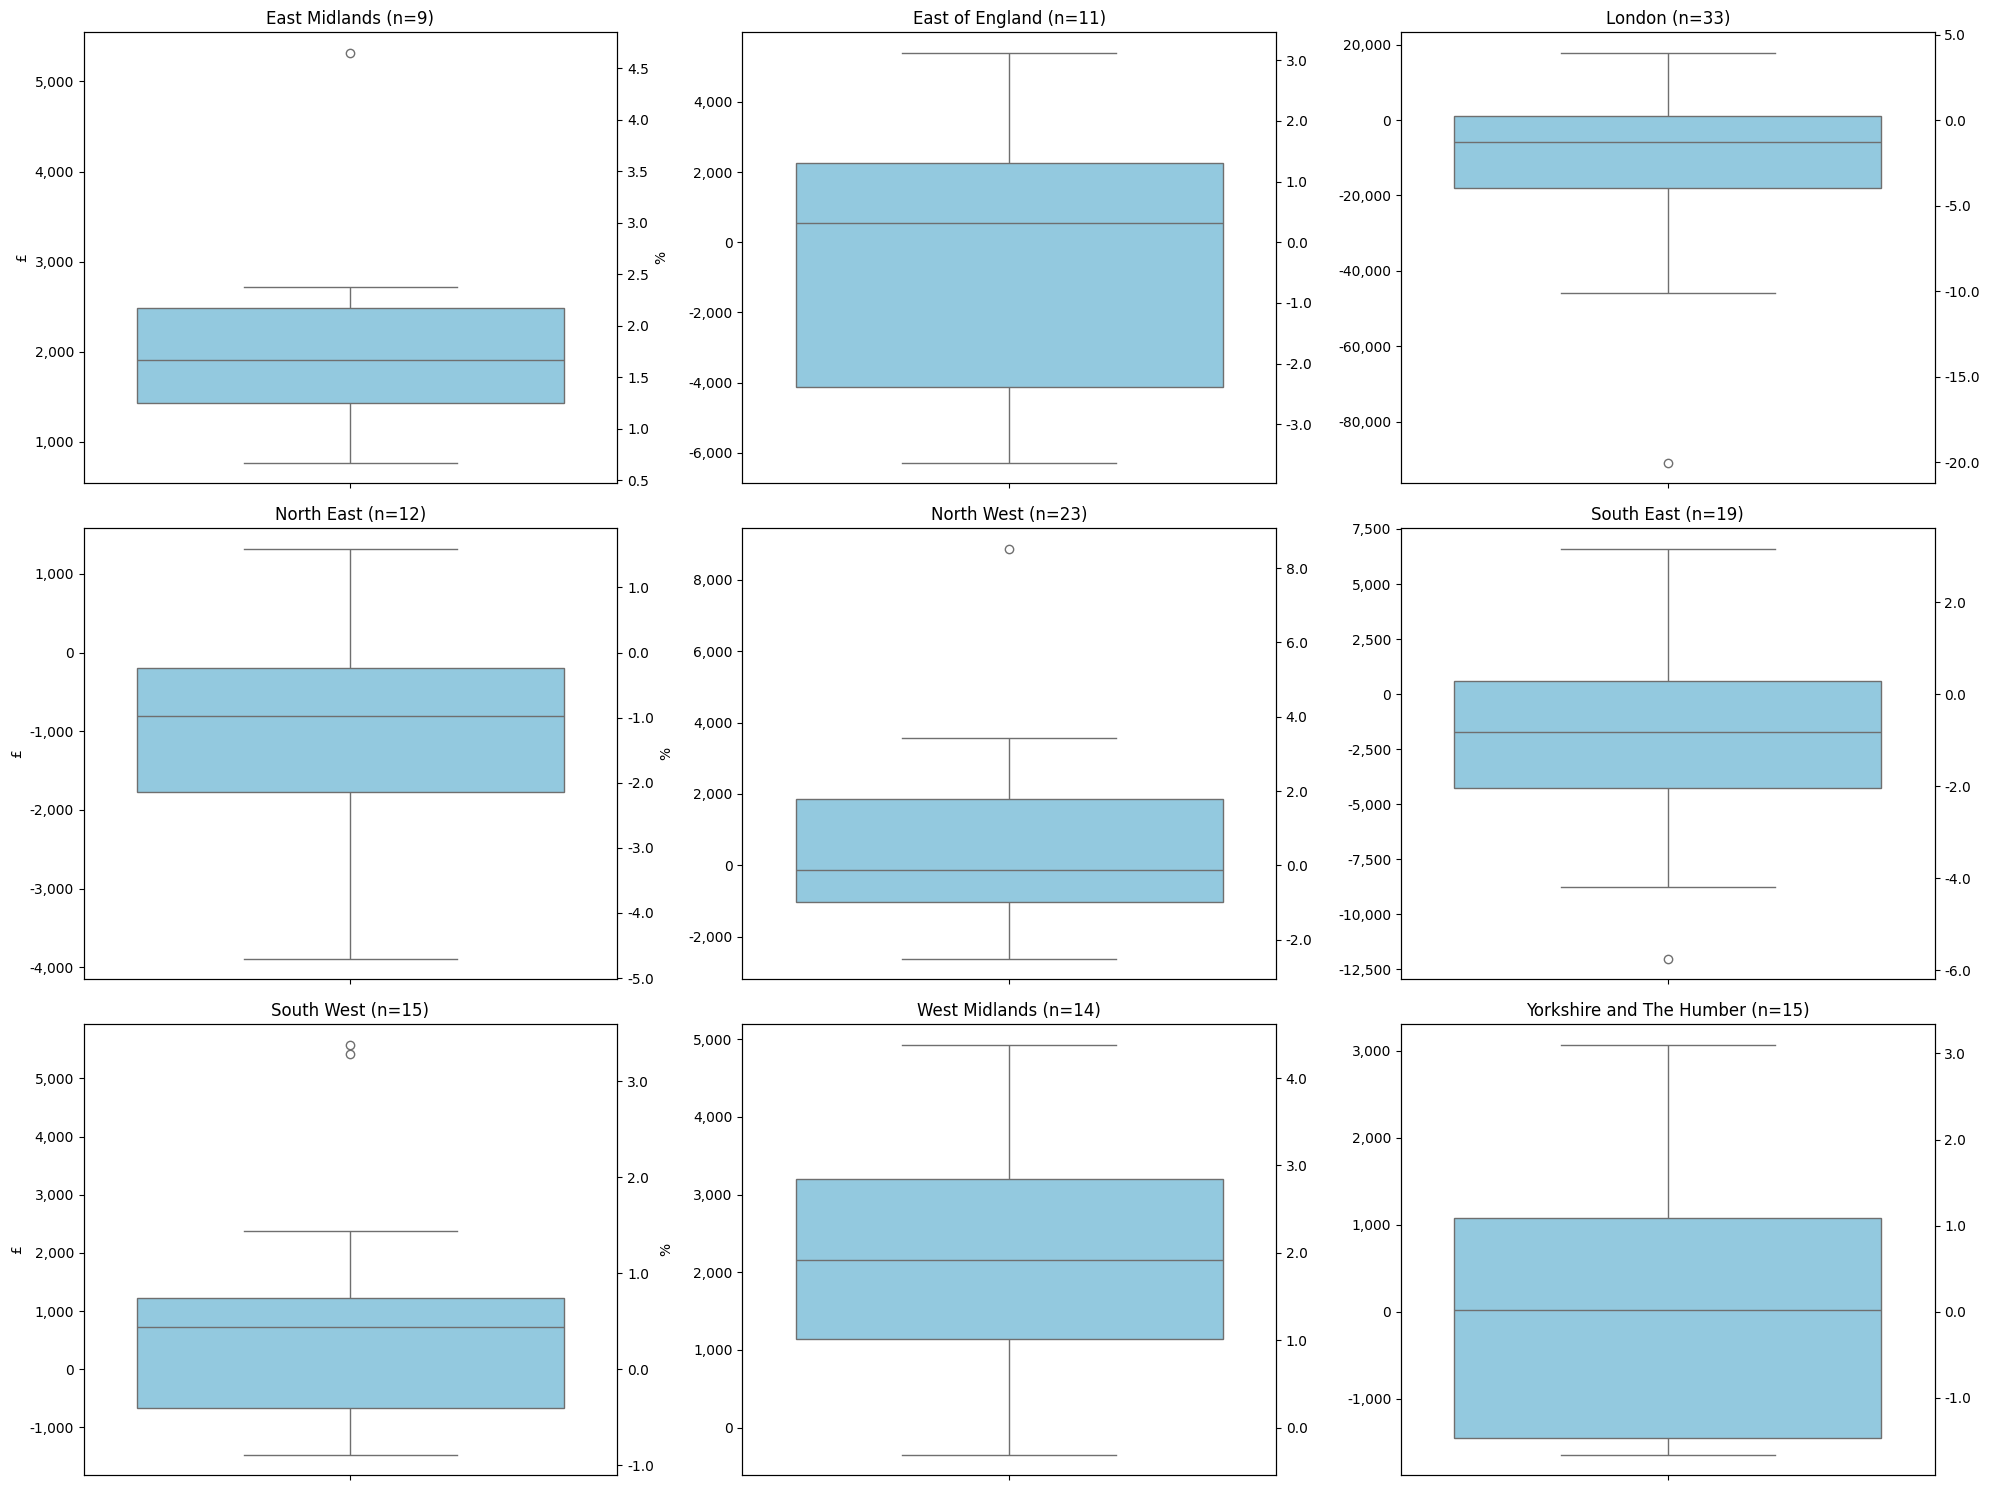

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

region_prices = df[['Area', 'RegionName']].drop_duplicates()

# Function to plot data for a specific region
def plot_region_data(ax1, ax2, region_name):
    region_areas = region_prices[region_prices['RegionName'] == region_name]['Area']
    region_data = area_prices.loc[region_areas]

    sns.boxplot(y='Price_Change', data=region_data, ax=ax1, color='skyblue')

    # Check if this subplot is in the first column
    is_first_col = ax1.get_subplotspec().colspan.start == 0

    # Add y-axis labels only for the first column to avoid redundancy
    ax1.set_ylabel('£' if is_first_col else '', fontsize=10)
    ax2.set_ylabel('%' if is_first_col else '', fontsize=10)

    # Format the y-axis of the left plot to display values in currency format
    ax1.yaxis.set_major_formatter(lambda x, _: f'{x:,.0f}')

    # Synchronize the right y-axis with the left, converting to percentage scale
    ylim1 = ax1.get_ylim()
    ax2.set_ylim([y * 100 / region_data['2017-07-01'].mean() for y in ylim1])
    ax2.yaxis.set_major_formatter(lambda x, _: f'{x:.1f}')

    ax1.set_title(f'{region_name} (n={len(region_data)})', fontsize=12)

# Generate boxplots for all regions
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(3, 3, figure=fig)
regions = sorted(region_prices['RegionName'].unique())

# Iterate over all regions and plot their data
for i, region in enumerate(regions):
    ax1 = fig.add_subplot(gs[i // 3, i % 3])
    ax2 = ax1.twinx()
    plot_region_data(ax1, ax2, region)

plt.tight_layout()
plt.show()

### 1.3 Pattern Analysis and Interpretation

Analysis of the price data reveals several significant patterns across geographical locations and price segments. In terms of area distribution, London and its surrounding areas, including the City of Westminster, Southwark, and Greenwich, experienced notable price declines ranging from -5% to -9%, with the City of Westminster recording the steepest drop at -9.06%. In contrast, northern cities demonstrated positive growth, with Manchester leading at 5.93%, followed by similar upward trends in Sandwell and Leicester, showing gains between 4% and 6%.

A clear correlation emerged between property price levels and growth rates. Areas with traditionally higher property values, predominantly in London, witnessed more substantial percentage decreases. Meanwhile, more affordable regions generally demonstrated positive growth, while mid-priced areas showed mixed performance. This trends suggests a shift in market dynamics.

The regional analysis further reinforces these patterns. London boroughs consistently fell within the negative growth range of -3% to -9%, while the East and West Midlands displayed steady positive growth. The North West and Yorkshire regions exhibited moderate variability in their price changes. Notably, most regions contained outliers, suggesting that specific areas deviated significantly from their regional trends.

## 2. Section 2: Statistical Analysis

### 2.1 Cross-tabulation

A cross-tabulation analysis is conducted to examine how price increases and decreases are distributed across regions.

In [102]:
import numpy as np

# Create Change category (Increase/Decrease)
area_prices['Change'] = np.where(area_prices['Price_Change'] > 0, 'Increase', 'Decrease')

# Use region_prices dataset for region information
cross_tab = pd.crosstab(
    area_prices['Change'],
    area_prices.index.map(region_prices.set_index('Area')['RegionName'])
)

# Display the result
print("Cross-tabulation of price changes by region:")
display(cross_tab)

Cross-tabulation of price changes by region:


col_0,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


### 2.2 Chi-squared Test

We investigate the independence between regions and price changes through chi-square test with G-test statistic, with p-values calculated.

Chi-squared test results:
Degrees of freedom: 8
G-test statistic: 32.19
p-value: 0.00861%


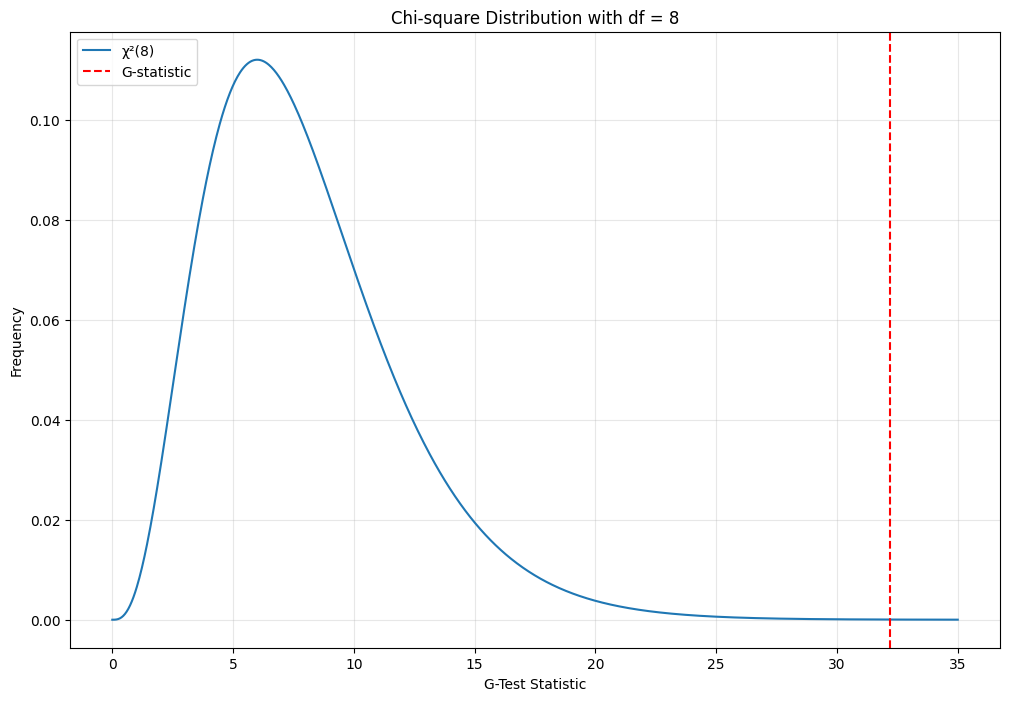

In [106]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

def calculate_g_statistic(data, expected):
    return 2 * sum([data[r,c] * np.log(data[r,c] / expected[r,c])
                    for r in range(data.shape[0])
                    for c in range(data.shape[1])
                    if data[r,c] != 0])

def chi_squared_test(observed_data):
    observed = observed_data.values

    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    total = observed.sum()
    expected = np.outer(row_totals, col_totals) / total

    G_stat = calculate_g_statistic(observed, expected)

    df = (observed.shape[0] - 1) * (observed.shape[1] - 1)
    p_value = 1 - stats.chi2.cdf(G_stat, df)

    return G_stat, df, p_value

# Perform chi-squared test
G, df, p_value = chi_squared_test(cross_tab)

# Print results
print('Chi-squared test results:')
print(f'Degrees of freedom: {df}')
print(f'G-test statistic: {G:.2f}')
print(f'p-value: {p_value:.5%}')

# Plot the distribution
plt.figure(figsize=(12, 8))
x = np.linspace(0, 35, 1000)
plt.plot(x, stats.chi2.pdf(x, df=df), label=f'χ²({df})')
plt.axvline(G, color='red', linestyle='--', label='G-statistic')
plt.xlabel('G-Test Statistic')
plt.ylabel('Frequency')
plt.title(f'Chi-square Distribution with df = {df}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2.3 Permutation Test

We investigate the independence between regions and price changes through permutation test, with p-values calculated.

Permutation Test Results:
G-test statistic: 32.19
p-value: 0.02000%


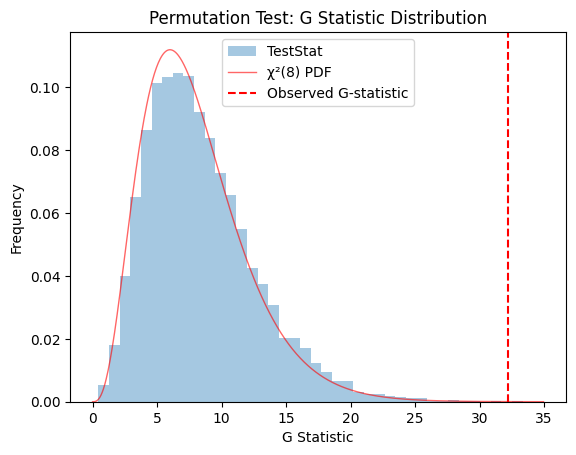

In [107]:
def permutation_test(observed_data, count=10000):
    observed = observed_data.values

    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    total = observed.sum()
    expected = np.outer(row_totals, col_totals) / total

    obs_score = calculate_g_statistic(observed, expected)

    gs = []
    for _ in range(count):
        permuted = np.random.multinomial(total, expected.flatten() / total).reshape(observed.shape)
        perm_row_totals = permuted.sum(axis=1)
        perm_col_totals = permuted.sum(axis=0)
        perm_expected = np.outer(perm_row_totals, perm_col_totals) / total

        gs.append(calculate_g_statistic(permuted, perm_expected))

    gs = np.array(gs)
    p_value = np.sum(gs >= obs_score) / len(gs)
    df = (observed.shape[0] - 1) * (observed.shape[1] - 1)

    return obs_score, df, p_value, gs

# Perform permutation test
obs_score, df, p_value, perm_stats = permutation_test(cross_tab, count=10000)

# Print results
print('Permutation Test Results:')
print(f'G-test statistic: {obs_score:.2f}')
print(f'p-value: {p_value:.5%}')

# Plot the distribution
plotdf = pd.DataFrame(data={'TestStat': perm_stats})
ax = plotdf.plot(kind='hist', bins=40, density=True, alpha=0.4, label="TestStat")

xs = np.arange(0, 35, 0.05)
ax.plot(xs, stats.chi2.pdf(xs, df), 'r-', lw=1, alpha=0.6, label=f'χ²({df}) PDF')
ax.axvline(obs_score, color='red', linestyle='--', label='Observed G-statistic')
ax.set_xlabel("G Statistic")
ax.set_ylabel("Frequency")
ax.set_title("Permutation Test: G Statistic Distribution")
_ = ax.legend()
plt.show()

## 3. Section 3: Discussion

### 3.1 Purpose of Testing

The analysis tests for a potential relationship between apartment price movements and geographical regions across the UK between 2017 and 2018. Under the null hypothesis (H₀), we assume price changes (increases/decreases) occur independently of regions, implying regional location has no influence on price movement patterns. The alternative hypothesis (H₁) suggests that price changes are not randomly distributed across regions but show systematic regional variations that cannot be attributed to chance. This framework allows us to evaluate whether observed regional differences in price patterns reflect genuine market distinctions rather than random fluctuations.

### 3.2 Chi-squared vs. Permutation Test Comparison

The chi-square test analyzes independence in contingency tables by quantifying the deviation between observed and expected frequencies, with the test statistic following a chi-square distribution. This approach requires sufficient data in each category to ensure valid asymptotic approximations.

Permutation testing provides a distribution-free approach by repeatedly randomizing the data while maintaining marginal frequencies. This generates an empirical distribution of test statistics, directly computing the probability of observing patterns as extreme as the data without asymptotic assumptions.

Both methods examine independence in contingency tables, but differ in their approaches. The chi-square test is computationally efficient for large samples but relies on asymptotic assumptions. Permutation testing, while computationally intensive, better handles small samples or sparse data by empirically constructing the null distribution.

### 3.3 Results and Interpretation

Both statistical tests provide strong evidence of regional patterns in UK apartment price changes. The chi-square test yields a test statistic of 32.19 (df=8, p=0.009%), while the permutation test yields a statistic of 32.19 (p=0.020%). Both p-values are far below common significance thresholds (e.g., 0.05 or 0.01), providing strong evidence to reject the null hypothesis that price changes and regions are independent.

The interpretation of the p-value in both tests is critical. It represents the likelihood of observing a test statistic as extreme as the one calculated, assuming the null hypothesis is true. In this analysis, the very low p-values indicate that the observed differences in price change patterns across regions are highly unlikely to have occurred by chance. This means the observed regional variation is not random but instead reflects significant, systematic differences in how property prices change across regions.

The data in the table also matches the conclusion: in the East Midlands, there is a clear preference for price increases (9 increases vs. 0 decreases), while in London the trend is the opposite, with 23 decreases vs. 10 increases. Overall, both the chi-square test and the permutation test come to the same conclusion: different regions show different patterns of price changes, and these differences are statistically significant. Regional differences in property price changes are real and cannot be attributed to random fluctuations.